In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Model

In [2]:
all_data=pd.read_csv(r"C:\Users\yashr\OneDrive\Desktop\Machine Learning\RNN\Stock Market\Quote-Equity-TRIGYN-EQ-22-05-2023-to-22-05-2024.csv")

In [3]:
print(all_data.columns)

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CLOSE',
       'VWAP', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


In [4]:
columns=all_data[['OPEN','HIGH','LOW','PREV. CLOSE','LTP','CLOSE','VWAP','52W H','52W L','VOLUME','VALUE','No of trades']]

In [5]:
data=pd.DataFrame(columns)

In [6]:
print(data.head())

     OPEN   HIGH     LOW  PREV. CLOSE     LTP   CLOSE    VWAP  52W H  52W L  \
0  113.95  117.0  112.85       113.65  113.50  113.30  114.23  168.0   92.1   
1  112.60  114.8  111.20       112.05  114.00  113.65  113.32  168.0   92.1   
2  113.90  114.0  111.55       113.85  112.00  112.05  112.38  168.0   92.1   
3  114.45  117.4  112.10       113.30  113.95  113.85  114.20  168.0   92.1   
4  113.40  114.6  112.80       112.80  113.00  113.30  113.56  168.0   92.1   

   VOLUME         VALUE No of trades  
0  70,002  79,96,044.35        1,403  
1   66453    7530689.35         1102  
2  100184    11258531.2         1326  
3   30417    3473516.35          432  
4   78596     8924969.4         1203  


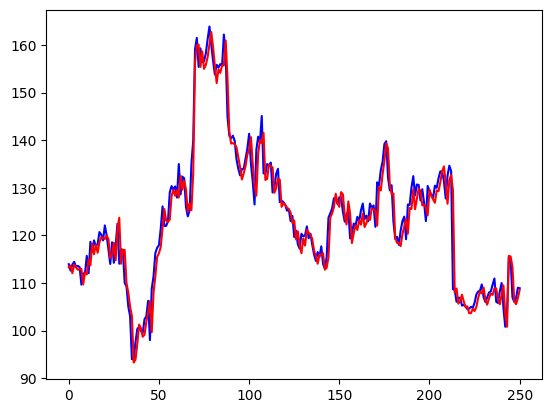

In [7]:
open_values=data['OPEN']
plt.plot(open_values,color='blue',label='Open Values')
close_values=data['CLOSE']
plt.plot(close_values,color='red',label='Closing Values')

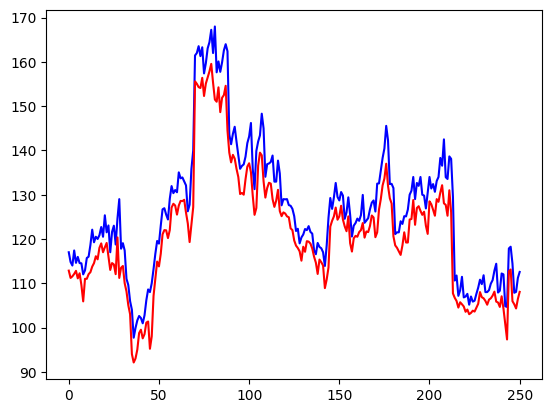

In [8]:
daily_high=data['HIGH']
daily_low=data['LOW']
plt.plot(daily_high,color='blue')
plt.plot(daily_low,color='red')

In [9]:
training_size=int(len(data)*0.55)
testing_size=len(data)-training_size
training_data = data.iloc[:training_size]
testing_data=data.iloc[training_size:]

In [10]:
def Create_Dataset(data,time_step,training_percent,feature):
    X=[]
    y=[]
    for i in range(len(data)-time_step):
        x=data[feature][i:i+time_step]
        _y=data[feature][i+time_step]
        X.append(x)
        y.append(_y)
    limit=int(len(data)*training_percent)
    X_train=X[:limit]
    y_train=y[:limit]
    X_test=X[limit:]
    y_test=y[limit:]
    return np.array(X),np.array(y),np.array(X_train),np.array(y_train),np.array(X_test),np.array(y_test)

In [11]:
training_percent=0.55
time_step=5
X,y,X_train,y_train,X_test,y_test=Create_Dataset(data,time_step,training_percent,'OPEN')

In [12]:
print(X.shape)
print(y.shape)

(246, 5)
(246,)


In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(138, 5)
(138,)
(108, 5)
(108,)


In [14]:
y=y.reshape((-1,1))
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))
from sklearn.preprocessing import MinMaxScaler
scaler_X=MinMaxScaler()
scaler_y=MinMaxScaler()
scaler_X_train=MinMaxScaler()
scaler_y_train=MinMaxScaler()
scaler_X_test=MinMaxScaler()
scaler_y_test=MinMaxScaler()
X_scaled=scaler_X.fit_transform(X)
y_scaled=scaler_y.fit_transform(y)
X_train_scaled=scaler_X_train.fit_transform(X_train)
y_train_scaled=scaler_y_train.fit_transform(y_train)
X_test_scaled=scaler_X_test.fit_transform(X_test)
y_test_scaled=scaler_y_test.fit_transform(y_test)
X=X.reshape((X.shape[0],X.shape[1],1))
X_scaled=X_scaled.reshape((X_scaled.shape[0],X_scaled.shape[1],1))
X_train_scaled=X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))
X_test_scaled=X_test_scaled.reshape((X_test_scaled.shape[0],X_test_scaled.shape[1],1))
print(X_scaled.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(246, 5, 1)
(138, 5, 1)
(108, 5, 1)


In [15]:
input_layer=tfl.Input(shape=(time_step,1))
layer_1=tfl.LSTM(units=128,return_sequences=True,kernel_initializer='glorot_uniform')(input_layer)
d_1=tfl.Dropout(0.5)(layer_1)
layer_2=tfl.LSTM(units=128,return_sequences=True,kernel_initializer='glorot_uniform')(d_1)
d_2=tfl.Dropout(0.5)(layer_2)
layer_3=tfl.LSTM(units=128,return_sequences=False,kernel_initializer='glorot_uniform')(d_2)
d_3=tfl.Dropout(0.5)(layer_3)
output_layer=tfl.Dense(1,kernel_initializer='glorot_uniform')(d_3)
model=Model(inputs=input_layer,outputs=output_layer)
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0   

In [16]:
history=model.fit(X_train_scaled,y_train_scaled,batch_size=32,verbose=1,epochs=500)

Epoch 1/500

5/5 [==============================] - 5s 19ms/step - loss: 0.2189
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 0.0475
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0454
Epoch 4/500
5/5 [==============================] - 0s 14ms/step - loss: 0.0300
Epoch 5/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0273
Epoch 6/500
5/5 [==============================] - 0s 13ms/step - loss: 0.0203
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 0.0178
Epoch 8/500
5/5 [==============================] - 0s 12ms/step - loss: 0.0174
Epoch 9/500
5/5 [==============================] - 0s 13ms/step - loss: 0.0181
Epoch 10/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0159
Epoch 11/500
5/5 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 12/500
5/5 [==============================] - 0s 11ms/step - loss: 0.0146
Epoch 13/500
5/5 [==============================

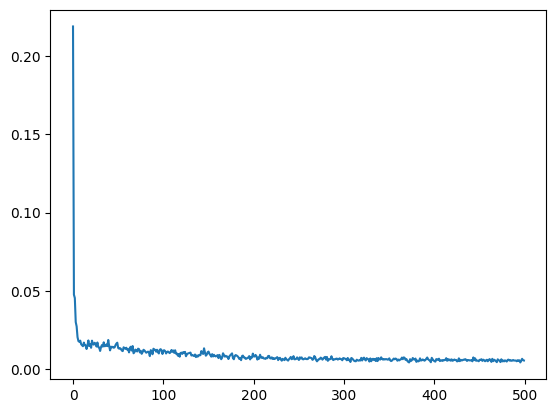

In [17]:
losses=history.history['loss']
plt.plot(losses)

4/4 [==============================] - 1s 6ms/step


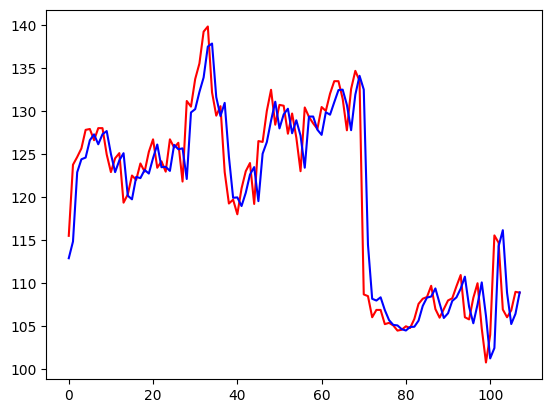

In [18]:
predict_y_test_scaled=model.predict(X_test_scaled)
predict_y_test_scaled=scaler_y_test.inverse_transform(predict_y_test_scaled)
plt.plot(y_test,color='red')
plt.plot(predict_y_test_scaled,color='blue')


5/5 [==============================] - 0s 3ms/step


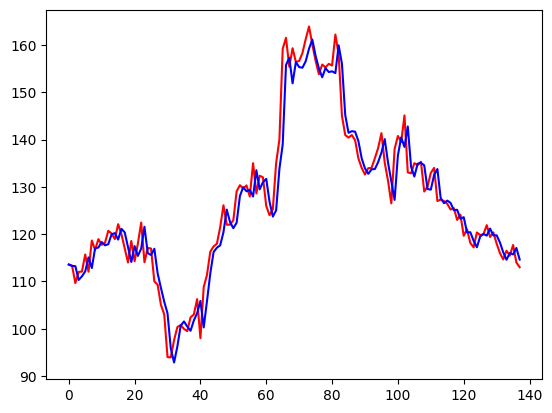

In [19]:
predict_y_train_scaled=model.predict(X_train_scaled)
predict_y_train_scaled=scaler_y_train.inverse_transform(predict_y_train_scaled)
plt.plot(y_train,color='red')
plt.plot(predict_y_train_scaled,color='blue')

In [21]:
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test,predict_y_test_scaled)
print(mse_test)
mse_train=mean_squared_error(y_train,predict_y_train_scaled)
print(mse_train)

16.42049165455182
17.29539309630116


8/8 [==============================] - 0s 4ms/step
16.980454176987614


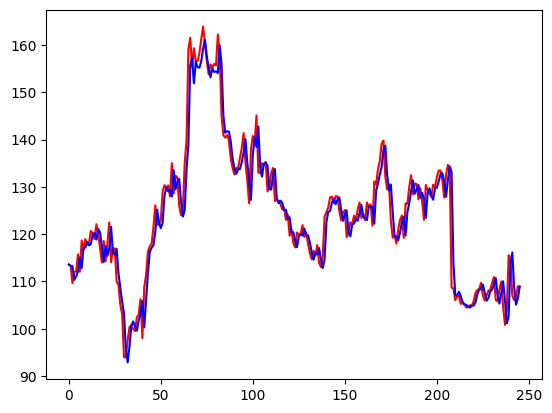

In [22]:
predict_y_scaled=model.predict(X_scaled)
predict_y_scaled=scaler_y.inverse_transform(predict_y_scaled)
plt.plot(y,color='red')
plt.plot(predict_y_scaled,color='blue')
mse=mean_squared_error(y,predict_y_scaled)
print(mse)

1/1 [==============================] - 0s 20ms/step
[[108.86356]]


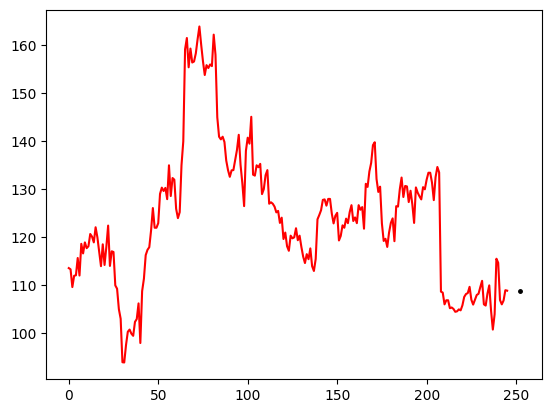

In [23]:
y_latest_scaled=model.predict(X_scaled[-1:])
y_latest=scaler_y.inverse_transform(y_latest_scaled)
print(y_latest)
y_latest=y_latest[-1]
plt.plot(y,color='red')
plt.plot(len(data)+1,y_latest,color='black',marker='.',markersize=5)

In [24]:
def predict(X,y,model,scaler):
    output=model.predict(X[-1:])
    output=output[-1]
    latest_input=(X[-1,-4:])
    latest_input=np.append(latest_input,output)
    latest_input = np.array(latest_input)
    latest_input = latest_input.reshape((1,5, 1))
    X=np.append(X,latest_input,axis=0)
    output=output.reshape((-1,1))
    output=scaler.inverse_transform(output)
    y=np.append(y,output,axis=0)
    return X,y

In [25]:
def generate_predictions(X,y,model,scaler,num_of_iterations):
    for _ in range(num_of_iterations):
        X,y=predict(X,y,model,scaler)
    return X,y

In [26]:
X_scaled_copy=X_scaled.copy()
y_copy=y.copy()

In [27]:
X_scaled_copy,y_copy=generate_predictions(X_scaled_copy,y_copy,model,scaler_y,1000)

1/1 [==============================] - 0s 22ms/step


[[108.86356354]
 [109.0909729 ]
 [108.99069214]
 [108.86834717]
 [108.80457306]
 [108.70588684]
 [108.6319809 ]
 [108.55329895]
 [108.47616577]
 [108.40133667]
 [108.32632446]
 [108.25292969]
 [108.18032074]
 [108.10874176]
 [108.03818512]
 [107.96858215]
 [107.89996338]
 [107.83230591]
 [107.76560974]
 [107.69985962]
 [107.63504028]
 [107.57115936]
 [107.50819397]
 [107.4461441 ]
 [107.38499451]
 [107.32472992]
 [107.26535797]
 [107.20685577]
 [107.14923096]
 [107.092453  ]
 [107.03651428]
 [106.98142242]
 [106.92716217]
 [106.87371063]
 [106.82107544]
 [106.76924133]
 [106.71820068]
 [106.66794586]
 [106.61845398]
 [106.56973267]
 [106.52176666]
 [106.47455597]
 [106.42807007]
 [106.38231659]
 [106.3372879 ]
 [106.29296875]
 [106.2493515 ]
 [106.20642853]
 [106.16418457]
 [106.12262726]
 [106.08172607]
 [106.04148102]
 [106.00189972]
 [105.96295166]
 [105.92463684]
 [105.88694   ]
 [105.84986877]
 [105.81340027]
 [105.77754211]
 [105.74226379]
 [105.70757294]
 [105.67345428]
 [105.63

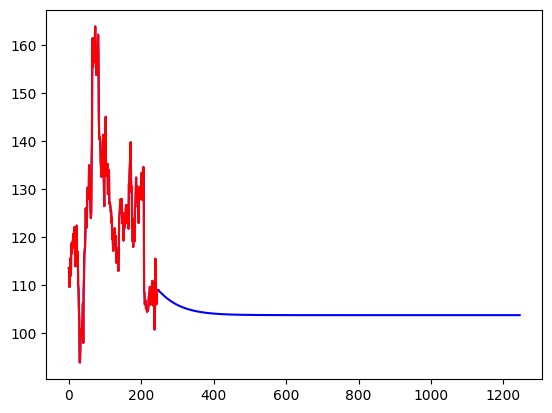

In [30]:
plt.plot(y_copy,color='blue')
plt.plot(y,color='red')
print(y_copy[-1000:])

In [29]:
y_latest_scaled=model.predict(X_scaled[-1:])
y_latest=scaler_y.inverse_transform(y_latest_scaled)
print(y_latest)

1/1 [==============================] - 0s 31ms/step
[[108.86356]]
